In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv("covid-19-data.csv", low_memory=False)
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,24/08/2020,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
1,23/08/2020,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
2,22/08/2020,22,8,2020,38,0,Afghanistan,AF,AFG,38041757.0,Asia,2.310619
3,21/08/2020,21,8,2020,97,2,Afghanistan,AF,AFG,38041757.0,Asia,2.415766
4,20/08/2020,20,8,2020,160,8,Afghanistan,AF,AFG,38041757.0,Asia,2.268560


In [3]:
pd.date_range('2020-01-01', periods=10, freq='2h20min')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:20:00',
               '2020-01-01 04:40:00', '2020-01-01 07:00:00',
               '2020-01-01 09:20:00', '2020-01-01 11:40:00',
               '2020-01-01 14:00:00', '2020-01-01 16:20:00',
               '2020-01-01 18:40:00', '2020-01-01 21:00:00'],
              dtype='datetime64[ns]', freq='140min')

In [4]:
dti = pd.date_range('2020-04', periods=20, freq='B')
dti

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28'],
              dtype='datetime64[ns]', freq='B')

In [5]:
pd.Timestamp(datetime.datetime(2020,1,1))

Timestamp('2020-01-01 00:00:00')

In [6]:
pd.Period('2020-01')

Period('2020-01', 'M')

In [7]:
pd.Period('2020-01', freq='D')

Period('2020-01-01', 'D')

In [8]:
pd.Period('2020-01', freq='D') + pd.Timedelta('1D')

Period('2020-01-02', 'D')

# Importation et Exploration des données COVID-19

Importons les données depuis le fichier CSV `covid-19-data.csv`

In [9]:
raw_data = pd.read_csv('covid-19-data.csv')

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38283 entries, 0 to 38282
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     38283 non-null  object 
 1   day                                                         38283 non-null  int64  
 2   month                                                       38283 non-null  int64  
 3   year                                                        38283 non-null  int64  
 4   cases                                                       38283 non-null  int64  
 5   deaths                                                      38283 non-null  int64  
 6   countriesAndTerritories                                     38283 non-null  object 
 7   geoId                                                       38120 non-null  object 
 

In [11]:
raw_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,24/08/2020,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
1,23/08/2020,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
2,22/08/2020,22,8,2020,38,0,Afghanistan,AF,AFG,38041757.0,Asia,2.310619
3,21/08/2020,21,8,2020,97,2,Afghanistan,AF,AFG,38041757.0,Asia,2.415766
4,20/08/2020,20,8,2020,160,8,Afghanistan,AF,AFG,38041757.0,Asia,2.268560


In [12]:
useless_cols = ['day', 'month', 'year', 'countryterritoryCode', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']

In [13]:
data = raw_data.drop(useless_cols, axis=1)
data.head()

,dateRep,cases,deaths,countriesAndTerritories,geoId,continentExp
0,24/08/2020,0,0,Afghanistan,AF,Asia
1,23/08/2020,105,2,Afghanistan,AF,Asia
2,22/08/2020,38,0,Afghanistan,AF,Asia
3,21/08/2020,97,2,Afghanistan,AF,Asia
4,20/08/2020,160,8,Afghanistan,AF,Asia


In [14]:
data['dateRep'] = pd.to_datetime(data['dateRep'], infer_datetime_format=True)
data.head()

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/3248485555.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['dateRep'] = pd.to_datetime(data['dateRep'], infer_datetime_format=True)
/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/3248485555.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['dateRep'] = pd.to_datetime(data['dateRep'], infer_datetime_format=True)


,dateRep,cases,deaths,countriesAndTerritories,geoId,continentExp
0,2020-08-24,0,0,Afghanistan,AF,Asia
1,2020-08-23,105,2,Afghanistan,AF,Asia
2,2020-08-22,38,0,Afghanistan,AF,Asia
3,2020-08-21,97,2,Afghanistan,AF,Asia
4,2020-08-20,160,8,Afghanistan,AF,Asia


In [15]:
date_min = data['dateRep'].min()
date_max = data['dateRep'].max()
print(date_min)
print(date_max)

2019-12-31 00:00:00
2020-08-24 00:00:00


In [16]:
data.index

RangeIndex(start=0, stop=38283, step=1)

In [17]:
data.set_index('dateRep', inplace=True)
data.head()

,cases,deaths,countriesAndTerritories,geoId,continentExp
dateRep,,,,,
2020-08-24,0,0,Afghanistan,AF,Asia
2020-08-23,105,2,Afghanistan,AF,Asia
2020-08-22,38,0,Afghanistan,AF,Asia
2020-08-21,97,2,Afghanistan,AF,Asia
2020-08-20,160,8,Afghanistan,AF,Asia


In [18]:
data.sort_index(inplace=True)
data.head()

,cases,deaths,countriesAndTerritories,geoId,continentExp
dateRep,,,,,
2019-12-31,0,0,North_Macedonia,MK,Europe
2019-12-31,0,0,Sri_Lanka,LK,Asia
2019-12-31,0,0,Lebanon,LB,Asia
2019-12-31,0,0,United_Kingdom,UK,Europe
2019-12-31,0,0,Estonia,EE,Europe


## Extraction des données d’un pays

découvrons la liste des pays dans la jeu de données

In [19]:
set(data["countriesAndTerritories"])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'British_Virgin_Islands',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fa

**Extrayons uniquement les données de la Chine**

In [20]:
china_set = data[data["countriesAndTerritories"] == "China"] 
china_set.head()

,cases,deaths,countriesAndTerritories,geoId,continentExp
dateRep,,,,,
2019-12-31,27,0,China,CN,Asia
2020-01-01,0,0,China,CN,Asia
2020-01-02,0,0,China,CN,Asia
2020-01-03,17,0,China,CN,Asia
2020-01-04,0,0,China,CN,Asia


In [21]:
china = china_set.drop(["countriesAndTerritories", "geoId", "continentExp"], axis=1)
china.head()

,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


In [22]:
china.shape

(238, 2)

## Filtrage des Séries Temporelles

**Localisation des dates et blocs de dates précises**

In [23]:
china.loc['2019']

,cases,deaths
dateRep,,
2019-12-31,27,0


In [24]:
china.loc['2020-01']

,cases,deaths
dateRep,,
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0
2020-01-05,15,0
2020-01-06,0,0
2020-01-07,0,0
2020-01-08,0,0
2020-01-09,0,0


In [25]:
china.loc['2020-01-03']

cases     17
deaths     0
Name: 2020-01-03 00:00:00, dtype: int64

In [26]:
china.loc['2020-01':'2020-03']

,cases,deaths
dateRep,,
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0
2020-01-05,15,0
...,...,...
2020-03-27,94,5
2020-03-28,119,3
2020-03-29,113,5


### Échantillonnages et Agrégations

**Échantillonnages des données de la chine en heure**

In [27]:
china.asfreq('H')

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/470248699.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  china.asfreq('H')


,cases,deaths
dateRep,,
2019-12-31 00:00:00,27.0,0.0
2019-12-31 01:00:00,NaN,NaN
2019-12-31 02:00:00,NaN,NaN
2019-12-31 03:00:00,NaN,NaN
2019-12-31 04:00:00,NaN,NaN
...,...,...
2020-08-23 20:00:00,NaN,NaN
2020-08-23 21:00:00,NaN,NaN
2020-08-23 22:00:00,NaN,NaN


In [28]:
china.asfreq('H', method='ffill')

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/2749220362.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  china.asfreq('H', method='ffill')


,cases,deaths
dateRep,,
2019-12-31 00:00:00,27,0
2019-12-31 01:00:00,27,0
2019-12-31 02:00:00,27,0
2019-12-31 03:00:00,27,0
2019-12-31 04:00:00,27,0
...,...,...
2020-08-23 20:00:00,38,0
2020-08-23 21:00:00,38,0
2020-08-23 22:00:00,38,0


In [29]:
china.asfreq('H', method='bfill')

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/3878583803.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  china.asfreq('H', method='bfill')


,cases,deaths
dateRep,,
2019-12-31 00:00:00,27,0
2019-12-31 01:00:00,0,0
2019-12-31 02:00:00,0,0
2019-12-31 03:00:00,0,0
2019-12-31 04:00:00,0,0
...,...,...
2020-08-23 20:00:00,41,0
2020-08-23 21:00:00,41,0
2020-08-23 22:00:00,41,0


In [30]:
china.asfreq('H', fill_value=0)

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/1648796332.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  china.asfreq('H', fill_value=0)


,cases,deaths
dateRep,,
2019-12-31 00:00:00,27,0
2019-12-31 01:00:00,0,0
2019-12-31 02:00:00,0,0
2019-12-31 03:00:00,0,0
2019-12-31 04:00:00,0,0
...,...,...
2020-08-23 20:00:00,0,0
2020-08-23 21:00:00,0,0
2020-08-23 22:00:00,0,0


**Agrégation des données de la chine**

In [31]:
china.resample('M').agg(['sum']).head(10)

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/2702083859.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  china.resample('M').agg(['sum']).head(10)


,cases,deaths
,sum,sum
dateRep,,
2019-12-31,27,0
2020-01-31,9687,213
2020-02-29,69641,2624
2020-03-31,2886,472
2020-04-30,1703,1328
2020-05-31,184,1
2020-06-30,652,3
2020-07-31,2709,18


In [32]:
china.resample('Q').agg(['sum','std'])

/var/folders/_q/7t1vg6856hx8mn_m37z8vt9r0000gn/T/ipykernel_8432/1334063634.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  china.resample('Q').agg(['sum','std'])


cases              deaths            
              sum          std    sum         std
dateRep                                          
2019-12-31     27          NaN      0         NaN
2020-03-31  82214  1875.884012   3309   46.854270
2020-06-30   2539    43.608882   1332  135.186991
2020-09-30   4915    62.794894     70    1.533026

**affichons la progression du nombre de cas**

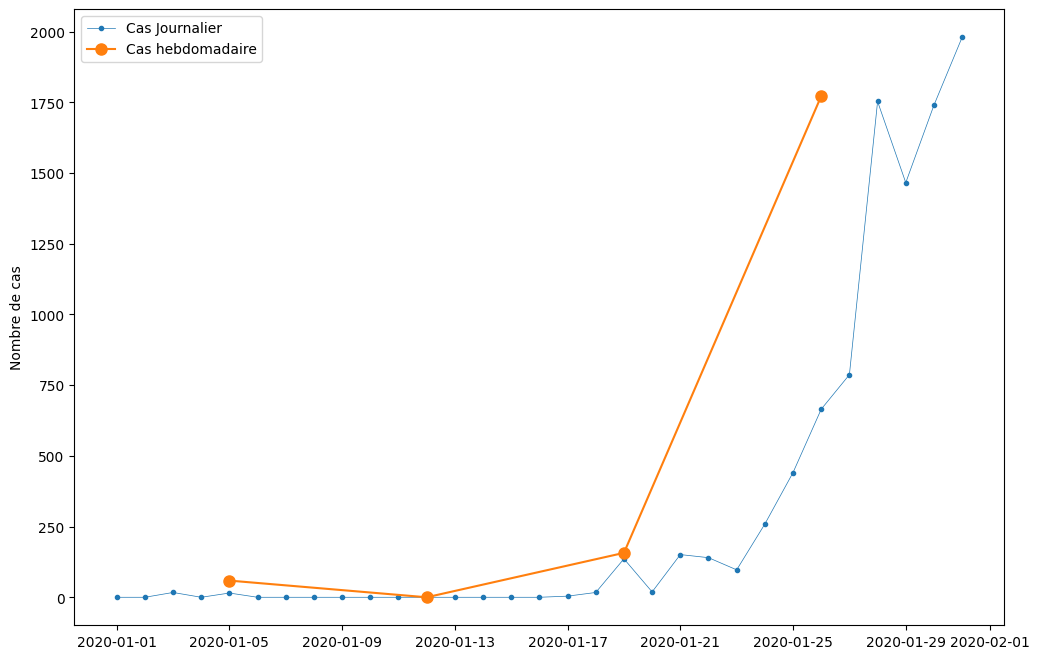

In [33]:
start, end = '2020-01-01', '2020-01-31'

china_week_mean = china_set.resample('W').agg(['sum'])

fig, axes = plt.subplots(figsize=(12,8))
axes.plot(china_set.loc[start:end, 'cases'], marker='.', linestyle='-', linewidth=0.5, label='Cas Journalier')
axes.plot(china_week_mean.loc[start:end, 'cases'], marker='o', markersize=8, linestyle='-', label='Cas hebdomadaire')
axes.set_ylabel('Nombre de cas')
axes.legend();

## Comparaison des Séries Temporelles

**écart entre x jours avec** `.shift()`

In [34]:
china['shifted_cases'] = china['cases'].shift(periods=1)
china['shifted_deaths'] = china['deaths'].shift(periods=1)
china.head()

,cases,deaths,shifted_cases,shifted_deaths
dateRep,,,,
2019-12-31,27,0,NaN,NaN
2020-01-01,0,0,27.0,0.0
2020-01-02,0,0,0.0,0.0
2020-01-03,17,0,0.0,0.0
2020-01-04,0,0,17.0,0.0


In [35]:
china['lagged_cases'] = china['cases'].shift(periods=-1)
china['lagged_deaths'] = china['deaths'].shift(periods=-1)
china.tail()

,cases,deaths,shifted_cases,shifted_deaths,lagged_cases,lagged_deaths
dateRep,,,,,,
2020-08-20,33,1,53.0,2.0,40.0,3.0
2020-08-21,40,3,33.0,1.0,49.0,2.0
2020-08-22,49,2,40.0,3.0,38.0,0.0
2020-08-23,38,0,49.0,2.0,41.0,0.0
2020-08-24,41,0,38.0,0.0,NaN,NaN


**différence entre x jour avec** `.diff()`

In [36]:
china.drop(["shifted_cases", "shifted_deaths", "lagged_cases", "lagged_deaths"], axis=1, inplace=True)

In [37]:
china['diff_deaths'] = china.deaths.diff()
china['diff_cases'] = china.cases.diff()
china.head()

,cases,deaths,diff_deaths,diff_cases
dateRep,,,,
2019-12-31,27,0,NaN,NaN
2020-01-01,0,0,0.0,-27.0
2020-01-02,0,0,0.0,0.0
2020-01-03,17,0,0.0,17.0
2020-01-04,0,0,0.0,-17.0


**pourcentage de progression entre x jours avec** `.pct_change()`

In [38]:
china.drop(["diff_cases", "diff_deaths"], axis=1, inplace=True)

In [39]:
china['pct_change_deaths'] = china.deaths.pct_change().mul(100)
china['pct_change_cases'] = china.cases.pct_change().mul(100)
china.head()

,cases,deaths,pct_change_deaths,pct_change_cases
dateRep,,,,
2019-12-31,27,0,NaN,NaN
2020-01-01,0,0,NaN,-100.0
2020-01-02,0,0,NaN,NaN
2020-01-03,17,0,NaN,inf
2020-01-04,0,0,NaN,-100.0


**affichons la progression cumulée du nombre de cas**

In [40]:
china.drop(["pct_change_deaths", "pct_change_cases"], axis=1, inplace=True)

In [41]:
china['cum_cases'] = china['cases'].cumsum()
china['cum_deaths'] = china['deaths'].cumsum()
china.head(20)

,cases,deaths,cum_cases,cum_deaths
dateRep,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0
2020-01-05,15,0,59,0
2020-01-06,0,0,59,0
2020-01-07,0,0,59,0
2020-01-08,0,0,59,0


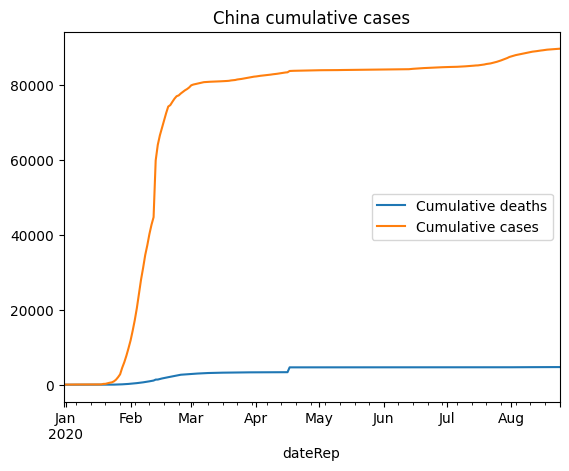

In [42]:
china['cum_deaths'].plot(label="Cumulative deaths")
china['cum_cases'].plot(label="Cumulative cases")
plt.title('China cumulative cases')
plt.legend()

### Généralisation et visualisation

In [43]:
def extract_country(raw_data, country, index_start, index_end):
    country_set = raw_data[raw_data["countriesAndTerritories"] == country]
    country_clean = country_set.drop(["countriesAndTerritories", "geoId", "continentExp"], axis=1)
    
    dates = pd.date_range(start=index_start, end=index_end, freq='D')
    country_clean.reindex(dates, fill_value=0)
    
    return country_clean

def plot_cum_evolution(data_set, country, columns):
    for column in columns:
        data_set[country + ' cumulative ' + column] = data_set[column].cumsum()
        data_set[country + ' cumulative ' + column].plot(label=country+" cumulative " + column)
    plt.title(country)
    plt.legend()
    plt.show()

In [44]:
italy_set = extract_country(data, 'Italy', date_min, date_max)
italy_set.head()

,cases,deaths
dateRep,,
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0


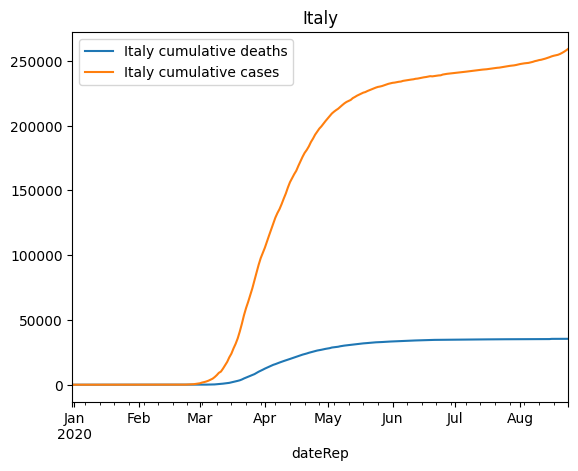

In [45]:
plot_cum_evolution(italy_set, 'Italy', ['deaths', 'cases'])